# Image Classification with MNIST Dataset

MNIST dataset, which stands for Modified National Institute of Standards and Technology database. It is a large database of handwritten digits that is commonly used for training various image processing systems.

The MNIST dataset is one of the most common datasets used for image classification and accessible from many different 
sources. In fact, even Tensorflow and Keras allow us to import and download the MNIST dataset directly from their API.

# Convolutional Neural Network

One of the most powerful supervised deep learning techniques is the Convolutional Neural NetworksCNNs are mainly used for image classification although you may find other application areas such as natural language processing.

We are capable of using many different layers in a convolutional neural network. However, convolution, pooling, and fully connect layers are the most important ones.

# Layers of CNN

1.Convolutional Layers

Convolutional layer is the very first layer where we extract features from the images in our datasets.

2.Pooling Layer

When constructing CNNs, it is common to insert pooling layers after each convolution layer to reduce the spatial size of the representation to reduce the parameter counts which reduces the computational complexity.

3.A Set of Fully Connected Layers

A fully connected network is our RegularNet where each parameter is linked to one another to determine the true relation and effect of each parameter on the labels.

In [1]:
#Importing the MNIST dataset
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [2]:
import matplotlib.pyplot as plt
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

8


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [5]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D


Using TensorFlow backend.


In [12]:
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0,2))
model.add(Dense(10, activation=tf.nn.softmax))

In [13]:
#Compiling and Fitting the Model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 84s 1ms/step - loss: 0.1723 - acc: 0.9480
Epoch 2/10
60000/60000 [==============================] - 82s 1ms/step - loss: 0.0615 - acc: 0.9814
Epoch 3/10
60000/60000 [==============================] - 82s 1ms/step - loss: 0.0375 - acc: 0.9883
Epoch 4/10
60000/60000 [==============================] - 81s 1ms/step - loss: 0.0241 - acc: 0.9923
Epoch 5/10
60000/60000 [==============================] - 83s 1ms/step - loss: 0.0185 - acc: 0.9939
Epoch 6/10
60000/60000 [==============================] - 83s 1ms/step - loss: 0.0139 - acc: 0.9955
Epoch 7/10
60000/60000 [==============================] - 82s 1ms/step - loss: 0.0124 - acc: 0.9956
Epoch 8/10
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0099 - acc: 0.9968
Epoch 9/10
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0085 - acc: 0.9974
Epoch 10/10
60000/60000 [==============================] - 86s 1ms/step - loss: 0.0081 - acc: 0.9972

In [14]:
#Evaluating the Model
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 4s 411us/step


[0.08492604368976936, 0.9833]

9


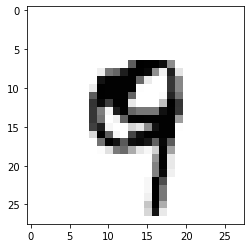

In [15]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28,28, 1))
print(pred.argmax())

In [3]:
Accuracy=98.3